In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk


# dss_team_project

## [House Price: Adcanced Regressin Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
+ team lucky
  + 권순호, 지성민, 김동현

+ Goal
	* it is your job to predict the sales price for each house.
	* For each Id in test set, you must predict the value of the SalePrice variable.

+ Metric
	* submissions are evaluated in Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.(Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally)

+ porject index
	* ~ 10/10 EDA(Exploratory data analysis)
	* ~ 10/14 Feature selection
	* ~ 10/16 Modeling(OLS Regression)
	* ~ 10/21 Model selection
	* ~ 10/25 Project 발표


### EDA 
+ 변수 탐색 및 분류
  + 변수가 무엇을 의미하는지 파악
  + 상관관계가 없는 변수는 어떤것이 있나?
  + 판매가격과 상관관계가 없는 변수는 어떻게 처리할 것인가?  #오탈자 수정
  + 의미없는값, 전처리가 필요한 값들을 선별및 가공하자


+ EDA 담당 Column
  + 김동현 : 01. MSSubClass ~ 28. Foundation (28개)   
  + 지성민 : 29. BsmtQual ~ 54. Functional (26개)  
  + 권순호 : 55. Fireplaces ~ 78. SalesCondition (24개)  
  

In [2]:
df = pd.read_csv('./data/train.csv')
df = df.set_index("Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.keys()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### 건축물
1.	MSSubClass : 거주유형
2.	 MSZoning : 일반 구역분류
3.	 LotFrontage : 자산에서 도로까지의 거리(단위:feet)
4.	 LotArea : 크기(단위:평방피트)
5.	 Street : 근접한 도로의 유형 ( Gravel-비포장(자갈) / Paved-포장 ) 
6.	  Alley : 근접한 골목의 유형
7.	 LotShape : 자산의 일반적인 형태
8.	 LandContour : 건물의 평평한 정도
9.	 Utilities : 가능한 편의시설의 종류
10.	Lot configuration : 부지 구성
11.	LandSlope : 건물의 기울기
12.	Neighborhood : 에임즈 시내 한정 물리적 위치
13.	Condition1 : 여러 조건에의 근접성
14.	Condition2 : 13이 달성된 상태에서의 여러 조건의 근접성
15.	BldgType : 건물 형태(1가족, 2가족, 양면가옥, 타운하우스)
16.	HouseStyle : 주거 스타일 (1층, 1층 반, 2층, 등등)
17.	OverallCond : 가옥의 전체적인 조건 (매우 훌륭, 훌륭, 매우 좋음, 좋음, 등등)

#### 준공 년도
18.	YearBuilt : 초기 준공연도
19.	YearRemodAdd : 리모델링연도(초기준공연도와 같다면 no remodeling or additions)

#### 형태, 재료
20.	RoofStyle : 지붕 형태 (평면, 박공(삼각), 등등)
21.	RoofMatl : 지붕 재료 (점토, 표준, 금속, 등등)
22.	Exterior1st : 건물 외벽 (아스팔트, 벽돌 등등)
23.	Exterior2nd : 건물 외벽 (건물외벽1의 재료 보다 많은 경우)
24.	MasVnrType : 석조 베니어 유형 (보통 벽돌, 벽돌 노출, 콘크리트 블럭, 없음, 돌)
25.	MasVnrArea : 석조 베니어 면적 (평방 피트)
26.	ExterQual : 건물 외벽 재료의 품질 (탁월함, 좋음, 평균, 나쁨 등)
27.	ExterCond : 건물 외벽 재료의 현재 상태 (탁월함, 좋음, 평균, 나쁨 등)
28.	Foundation : 건물 기초의 종류 (벽돌, 콘크리트 블록, 공구리, 돌) 

#### 지하층
29.	BsmtQual : 지하층의 높이에 대한 평가 (탁월함, 좋음, 등등)
30.	BsmtCond : 지하층에 대한 전반적인 평가 (탁월함, 좋음 등등)
31.	BsmtExposure : 지하층 노출 
32.	BsmtFinType1 : 지하실 완성 구역의 등급 (살기 좋은, 살기 보통인, 평균적인, 등등)
33.	BsmtFinSF1 : 지하실 완성 구역의 넓이-타입1 (평방 피트)
34.	BsmtFinType2 : 지하실 완성 구역의 등급 – 여러 타입이라면 (살기 좋은, 등등)
35.	BsmtFinSF2 : 지하실 완성 구역의 넓이-타입2 (평방 피트)
36.	BsmtUnfSF : 지하실 미완성 구역의 넓이 (평방 피트)
37.	TotalBsmtSF : 지하실 전체 넓이 (평방 피트)

#### 냉,난방
38.	Heating : 난방 종류 (바닥난로, 가스 공기 가열, 가스 스팀, 벽난로 등)
39.	HeatingQC : 난반의 품질과 상태 (탁월함, 좋음, 평균, 꽤, 나쁨)
40.	CentralAir : 중앙 에어컨 (Y/N)
41.	Electrical : 전기시스템 

#### 층별 넓이
42.	1stFlrSF : 1층 넓이 (평방 피트)
43.	2ndFlrSF : 2층 넓이 (평방 피트)
44.	LowQualFinSF : 낮은 품질로 마감된 평방 피트
45.	GrLivArea : 지상의 거주구역 넓이(평방피트)

#### 화장실
46.	BsmtFullBath : 지하실 풀 샤워실
47.	BsmtHalfBath : 지하실 반 샤워실
48.	FullBath : 지상 풀 샤워실
49.	HalfBath : 지상 반 샤워실

#### 침실
50.	Bedroom : 지상 침실

#### 주방
51.	Kitchen : 지상 부엌
52.	KitchenQual : 주방의 품질 (탁월, 좋음, 평균, 꽤, 나쁨)

#### 방갯수
53.	TotRmsAbvGrd : 지상의 총 방 개수

#### 집기능
54.	Functional : 집의 기능 (잘 기능함, 다소 부족함, 많이 부족함, 꽤 망가짐, 폐기물)

#### 벽난로
55.	Fireplaces : 벽난로 갯수
56.	FireplaceQu : 벽난로의 품질

#### 주차장
57.	GarageType : 주차장 위치 (1개 이상, 집에 붙어, 지하창고 등)
58.	GarageYrBlt : 주차장이 만들어진 연도
59.	GarageFinish : 주차장 인테리어 마감 정도 (마감됨, 거칠게 마감됨, 마감안됨, 주차장없음)
60.	GarageCars : 주차장의 차량 수용능력
61.	GarageArea : 주차장의 넓이 (평방 피트)
62.	GarageQual : 주차장의 품질 (탁월, 좋음, 평균, 다소, 나쁨, 주차장 없음)
63.	GarageCond : 주차장의 상태 (탁월, 좋음, 평균, 다소, 나쁨, 주차장 없음)

#### 배란다
64.	PavedDrive : 포장도로 여부 (포장됨, 부분 포장, 먼지/자갈)
65.	WoodDeckSF : 나무 갑판지역의 넓이 (평방 피트)
66.	OpenPorchSF : 개방된 배란다-현관의 넓이 (평방 피트)
67.	EnclosedPorch : 내부 배란다-현관의 넓이 (평방 피트)
68.	3SsnPorch : 3계절 배란다-현관의 넓이 (평방 피트)
69.	ScreenPorch : 스크린 배란다-현관의 넓이 (평방 피트)

#### 수영장
70.	PoolArea : 수영장 넓이 (평방 피트)
71.	PoolQC : 수영장 품질

#### 담장
72.	Fence : 담장 품질

#### 기타
73.	MiscFeature : 기타 요소 (엘리베이터, 2층차고, 기타, 테니스코트, 등)
74.	MiscVal : 기타 요소의 가치

#### 구매 날짜
75.	MoSold : 구매 월
76.	YrSold : 구매 년

#### 판매
77.	SaleType : 판매 형식 (재래식 보증증서, 현금 보증증서, 대출 보증증서, 건설 후 판매, 등)
78.	SaleType : 판매 형식 (재래식 보증증서, 현금 보증증서, 대출 보증증서, 건설 후 판매, 등)


In [4]:
Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, 
EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

SyntaxError: invalid syntax (<ipython-input-4-24c8bd6f1e16>, line 2)

In [ ]:
FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC,
Fence, MiscFeature, SaleType, SaleCondition

###  연속변수와 카테고리 변수로 구분

In [ ]:
# 연속 변수
cols_real = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtUnfSF', 'TotalBsmtSF', '_1stFlrSF', '_2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
             'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

# 카테고리 변수
cols_cat = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
            'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
            'MoSold', 'SaleType', 'SaleCondition']
            
print(len(cols_real))
print(len(cols_cat))

# Data_Set 81개의 coloumn 중 Id 와 SalePrice 제외

In [ ]:
dfy = df.ix[:, :]
dfX = df.ix[:, :]
print(len(dfy.columns), len(dfX.columns))

In [ ]:
dfX_real = dfX[cols_real]
dfX_cat = dfX[cols_cat]

print(len(dfX_real.columns), len(dfX_cat.columns))

### 상관계수와 상관계수 행렬
* only for real variables
* correlation coefficient with y ( SalePrice )
  - MSSubClass
  - LotFrontage
  - LotArea
  - OverallQual
  - OverallCond
  - YearBuilt
  - BsmtFinSF1
  - BsmtFinSF2
  - BsmtUnfSF
  - TotalBsmtSF
  - 1stFlrSF
  - 2ndFlrSF
  - LowQualFinSF
  - GrLivArea
  - BsmtFullBath
  - BsmtHalfBath
  - FullBath
  - HalfBath
  - BedroomAbvGr
  - KitchenAbvGr
  - TotRmsAbvGrd
  - Fireplaces
  - GarageYrBlt
  - GarageCars
  - GarageArea
  - WoodDeckSF
  - OpenPorchSF
  - EnclosedPorch
  - 3SsnPorch
  - ScreenPorch
  - PoolArea
  - MiscVal
  - YrSold

In [ ]:
df_real = pd.concat([dfy.SalePrice, dfX_real], axis=1)
df_real.head()

In [ ]:
# Correlation Matrix of dfX_real
corrmat = df_real.corr()
corrmat

In [ ]:
f, ax = plt.subplots(figsize=(60, 50))
sns.heatmap(corrmat, annot=True)

** 상관계수와 유의확률 확인**
* all coefficients between y and X are fine

In [ ]:
# 피어슨 상관계수를 확인하는 함수 정의
def check_pearsonr(y, X):
    result = sp.stats.pearsonr(y, X)
    print("rho : {}  ,  p-value : {}".format(result[0], result[1]))

* 아래 변수들은 유의미한 상관계수들이다.

In [ ]:
check_pearsonr(df.SalePrice, df.OverallQual) # Overall material and finish quality : 전체 자재 및 마감재 품질
check_pearsonr(df.SalePrice, df.YearBuilt) # Original construction date : 최초 건설 일자
check_pearsonr(df.SalePrice, df.TotalBsmtSF) # Total square feet of basement area : TotalBsmtSF
check_pearsonr(df.SalePrice, df._1stFlrSF) # First Floor square feet : 1층 평방 피트
check_pearsonr(df.SalePrice, df.GrLivArea) # Above grade (ground) living area square feet : 거주 면적 평방피트 (지면)
check_pearsonr(df.SalePrice, df.FullBath) # Full bathrooms above grade : 1등급 이상의 화장실
check_pearsonr(df.SalePrice, df.TotRmsAbvGrd) # Total rooms above grade (does not include bathrooms) : 욕실을 제외한 등급 이상의 방 수
check_pearsonr(df.SalePrice, df.Fireplaces) # Number of fireplaces : 벽난로 수
check_pearsonr(df.SalePrice, df.GarageCars) # Size of garage in car capacity : 차고의 차 용량 크기


* 그러나, 아래 변수들은 너무 낮은 상관계수를 나타내고 있다.

In [ ]:
check_pearsonr(df.SalePrice, df.MSSubClass)
check_pearsonr(df.SalePrice, df.LotFrontage)
check_pearsonr(df.SalePrice, df.LotArea)
check_pearsonr(df.SalePrice, df.OverallCond)
check_pearsonr(df.SalePrice, df.BsmtFinSF1)
check_pearsonr(df.SalePrice, df.BsmtFinSF2)
check_pearsonr(df.SalePrice, df.BsmtUnfSF)
check_pearsonr(df.SalePrice, df._2ndFlrSF)
check_pearsonr(df.SalePrice, df.LowQualFinSF)
check_pearsonr(df.SalePrice, df.BsmtFullBath)
check_pearsonr(df.SalePrice, df.BsmtHalfBath)
check_pearsonr(df.SalePrice, df.HalfBath)
check_pearsonr(df.SalePrice, df.BedroomAbvGr)
check_pearsonr(df.SalePrice, df.KitchenAbvGr)
check_pearsonr(df.SalePrice, df.GarageYrBlt)
check_pearsonr(df.SalePrice, df.WoodDeckSF)
check_pearsonr(df.SalePrice, df.OpenPorchSF)
check_pearsonr(df.SalePrice, df.EnclosedPorch)
check_pearsonr(df.SalePrice, df._3SsnPorch)
check_pearsonr(df.SalePrice, df.ScreenPorch)
check_pearsonr(df.SalePrice, df.PoolArea)
check_pearsonr(df.SalePrice, df.MiscVal)
check_pearsonr(df.SalePrice, df.YrSold)


In [ ]:
# 유의미한 연속 변수들 구분
cols_real_use = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'FullBath', 
                'Fireplaces', 'GarageCars']

dfX_real_use = dfX[cols_real_use]

print(len(dfX_real_use.columns))

In [ ]:
df_real_use = pd.concat([dfy.SalePrice, dfX_real_use], axis=1)
df_real_use.head()

In [ ]:
corrmat_use = df_real_use.corr()
corrmat_use

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat_use, annot=True)

In [ ]:
# 선택사항 : matplotlib.pyplot 스타일 리스트
print(plt.style.available)

In [ ]:
for i in range(0, len(cols_real_use), 3):
    print("dfX{}".format(cols_real_use[i: i+3]))

In [ ]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.SalePrice, dfX[cols_real_use[:6]]], axis=1) ,size=1.5)

    
# Overall material and finish quality : 전체 자재 및 마감재 품질
# Original construction date : 최초 건설 일자
# Total square feet of basement area : TotalBsmtSF
# First Floor square feet : 1층 평방 피트
# Above grade (ground) living area square feet : 거주 면적 평방피트 (지면)
# Total rooms above grade (does not include bathrooms) : 욕실을 제외한 등급 이상의 방 수


In [ ]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.SalePrice, dfX[cols_real_use[6:]]], axis=1) ,size=2.5)

    
# Full bathrooms above grade : 1등급 이상의 화장실
# Number of fireplaces : 벽난로 수
# Size of garage in car capacity : 차고의 차 용량 크기


#### 벽난로
Fireplaces : 벽난로 갯수

FireplaceQu : 벽난로의 품질 
* Ex Excellent - Exceptional Masonry Fireplace  
* Gd Good - Masonry Fireplace in main level  
* TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement  
* Fa Fair - Prefabricated Fireplace in basement  
* Po Poor - Ben Franklin Stove    
* NA No Fireplace   

#### 주차장
GarageType : 주차장 위치 (1개 이상, 집에 붙어, 지하창고 등)
* 2Types More than one type of garage  
* Attchd Attached to home  
* Basment Basement Garage  
* BuiltIn Built-In (Garage part of house - typically has room above garage)  
* CarPort Car Port  
* Detchd Detached from home  
* NA No Garage  

GarageYrBlt : 주차장이 만들어진 연도

GarageFinish : 주차장 인테리어 마감 정도 (마감됨, 거칠게 마감됨, 마감안됨, 주차장없음)
* Fin Finished  
* RFn Rough Finished  
* Unf Unfinished  
* NA No Garage  

GarageCars : 주차장의 차량 수용능력  

GarageArea : 주차장의 넓이 (평방 피트)

GarageQual : 주차장의 품질 (탁월, 좋음, 평균, 다소, 나쁨, 주차장 없음)
* Ex Excellent  
* Gd Good  
* TA Typical/Average  
* Fa Fair  
* Po Poor  
* NA No Garage  

GarageCond : 주차장의 상태 (탁월, 좋음, 평균, 다소, 나쁨, 주차장 없음)
* Ex Excellent  
* Gd Good  
* TA Typical/Average  
* Fa Fair  
* Po Poor  
* NA No Garage  

#### 배란다
PavedDrive : 포장도로 여부 (포장됨, 부분 포장, 먼지/자갈)
* Y Paved  
* P Partial Pavement  
* N Dirt/Gravel  

WoodDeckSF : 나무 갑판지역의 넓이 (평방 피트)

OpenPorchSF : 개방된 배란다-현관의 넓이 (평방 피트)  

EnclosedPorch : 내부 배란다-현관의 넓이 (평방 피트)

3SsnPorch : 3계절 배란다-현관의 넓이 (평방 피트)

ScreenPorch : 스크린 배란다-현관의 넓이 (평방 피트)

#### 수영장
PoolArea : 수영장 넓이 (평방 피트)

PoolQC : 수영장 품질
* Ex Excellent  
* Gd Good  
* TA Average/Typical  
* Fa Fair  
* NA No Pool  

#### 담장
Fence : 담장 품질
* GdPrv Good Privacy  
* MnPrv Minimum Privacy  
* GdWo Good Wood  
* MnWw Minimum Wood/Wire  
* NA No Fence  

#### 기타
MiscFeature : 기타 요소 (엘리베이터, 2층차고, 기타, 테니스코트, 등)
* Elev Elevator  
* Gar2 2nd Garage (if not described in garage section)  
* Othr Other  
* Shed Shed (over 100 SF)  
* TenC Tennis Court  
* NA None  

MiscVal : 기타 요소의 가치

#### 구매 날짜
MoSold : 구매 월

YrSold : 구매 년

#### 판매
SaleType : 판매 형식 (재래식 보증증서, 현금 보증증서, 대출 보증증서, 건설 후 판매, 등)
* WD Warranty Deed - Conventional  
* CWD Warranty Deed - Cash  
* VWD Warranty Deed - VA Loan  
* New Home just constructed and sold  
* COD Court Officer Deed/Estate  
* Con Contract 15% Down payment regular terms  
* ConLw Contract Low Down payment and low interest  
* ConLI Contract Low Interest  
* ConLD Contract Low Down  
* Oth Other  

SaleCondition : 판매조건 (일반판매, 비정상판매-압류, 급매, 인접토지구매, 할당, 가족간거래, 건축미완공)
* Normal Normal Sale  
* Abnorml Abnormal Sale - trade, foreclosure, short sale  
* AdjLand Adjoining Land Purchase  
* Alloca Allocation - two linked properties with separate deeds, typically condo with a garage unit  
* Family Sale between family members  
* Partial Home was not completed when last assessed (associated with New Homes)  

# 개인작업_Column 01.~28 분석

## 양적 변수와 카테고리 변수 분류
* MSSubClass 를 카테고리변수로 이동
* YearRemodAdd 와 MasVnrArea 를 양적변수로 이동

In [5]:
# 양적 변수
cols_real_work1 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'SalePrice']

# 카테고리 변수
cols_cat_work1 = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                  'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                  'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation']
            
print(len(cols_real_work1))
print(len(cols_cat_work1))


8
20


In [6]:
df_scatr_work1 = pd.read_csv('./data/train.csv', usecols=cols_real_work1)

print (df_scatr_work1.columns)
print (df_scatr_work1.head())

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'SalePrice'],
      dtype='object')
   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  SalePrice  
0       196.0     208500  
1         0.0     181500  
2       162.0     223500  
3         0.0     140000  
4       350.0     250000  


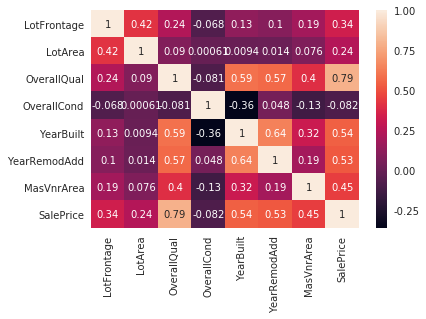

In [7]:
compare_feature_work1 = df_scatr_work1.corr()
draw = sns.heatmap(compare_feature_work1, annot = True)
plt.show(draw)

In [8]:
cols_real_work1_use = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'SalePrice']

In [9]:
df_scatr1_work1= df.loc[:, cols_real_work1_use]

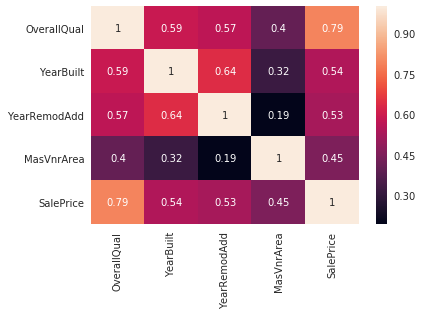

In [10]:
compare_feature1 = df_scatr1_work1.corr()
draw = sns.heatmap(compare_feature1, annot = True)
plt.show(draw)

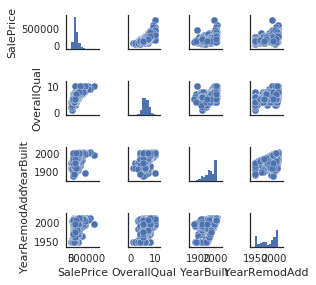

In [11]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df_scatr1_work1.SalePrice, df_scatr1_work1[cols_real_work1_use[:3]]], axis=1) ,size=1)
plt.show()

## 양적변수 분석결과
#### 분석대상 : 8 개의 변수 (LotFrontage, LotArea, OverallQual, OverAllCond, YearBuilt, YearRemodAdd, MasVnrArea)

#### 상관계수 결과
* LotFrontage : 0.34   | 배제
* LotArea : 0.24       | 배제
* OverallQual : 0.79   | 선택
* OverAllCond : -0.082 | 배제
* YearBuilt : 0.54     | 선택
* YearRemodAdd : 0.53  | 선택
* MasVnrArea : 0.45    | 선택? 배제?

### 문제제기

 ##### LotFrontage
* LotFrontage 의 가격-상관계수는 0.34임. 하지만, 자료자체에 0 값이 많아서 왜곡이 발생하였을 가능성 존재함. 
* 이를 해결하기 위해 0이 포함된 행을 제거하고, 다시 상관관계를 구해서 실제로 무의미한 변수인지 확인하는 작업이 필요할 듯.

##### YearBuilt 와 YearRemodAdd 
* 개념상으로 YearRemodAdd는 리모델링을 하지 않았을 경우는 YearBuilt의 값을 쓰기 때문에 YearBuilt의 내용을 포함한 더 업데이트된 자료라고 보여짐. 
* 그런데 오히려 상관계수는 0.01 더 낮음. 
* 이를 해결하기 위해 YearBuilt 와 YearRemodAdd를 병합할지, 아니면 양쪽 중 하나만 쓸지, 아니면 조작없이 둘 다 쓸지 결정할 필요 있음.
* YearRemodAdd 의 상관계수가 0.01 더 낮은 이유에 대해서 고찰 필요할 듯.

##### MasVnrArea
* Pairplot 이 안그려짐. Error 이유는 맥스값이 민값보다 낮다고 함.
* 정확한 원인은 모르겠지만 Value에 0 이 많아서 그렇지 않을까 추측함. 
* 이로 인한 왜곡가능성의 존재? 상관도도 0.45 임. 버릴까?


In [ ]:
cols_cat_work1 = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                 'ExterQual', 'ExterCond', 'Foundation', 'SalePrice']

cols_cat_work11 = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'SalePrice']

cols_cat_work12 = ['HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                 'ExterQual', 'ExterCond', 'Foundation', 'SalePrice']
                  

## 질적변수의 내용들을 숫자로 바꾸는 전처리작업 필요함!!  with Pandas??
#### 변경코드
* MSZoning : A - 1, C - 2, FV - 3, I - 4, RH - 5, RL - 6, RP - 7, RM - 8
* Lotshape : Reg - 1, IR1 - 2, IR2 - 3, IR3 - 4
* LandContour : Lvl - 1, Bnk - 2, HLS - 3, Low - 4
* Lotconfig : Inside - 1, Corner - 2, CulDSac - 3, FR2 - 4, FR3 - 5
* LandSlope : Gtl - 1, Mod - 2, Sev - 3
* Neighborhood : 
* Condition1 : Artery - 1, Feedr - 2, Norm - 3, RRNn - 4, RRAn - 5, PosN - 6, PosA - 7, RRNe - 8, RRAe - 9
* Condition2 : Artery - 1, Feedr - 2, Norm - 3, RRNn - 4, RRAn - 5, PosN - 6, PosA - 7, RRNe - 8, RRAe - 9
* BldgType : 1Fam - 1, 2FmCon - 2, Duplx - 3, TwnhsE - 4, TwnhsI - 5
* HouseStyle : 1Story - 1, 1.5Fin - 2, 1.5Unf - 3, 2Story - 4, 2.5Fin - 5, 2.5Unf - 6, SFoyer - 7, SLvl - 8
* RoofStyle : Flat - 1, Gable - 2, Gambrel - 3, Hip - 4, Mansard - 5, Shed - 6
* RoofMatl : ClyTile - 1, CompShg - 2, Membran - 3, Metal - 4, Roll - 5, Tar&Grv - 6, WdShake - 7, WdShngl - 8
* Exterior1st : AsbShng - 1, AsphShn - 2, BrkComm - 3, BrkFace - 4, CBlock - 5, CemntBd - 6, HdBoard - 7, ImStucc - 8, MetalSd - 9, Other - 10, Plywood - 11, PreCast - 12, Stone - 13, Stucco - 14, VinylSld - 15, Wd Sdng - 16, WdShing - 17
* Exterior2nd : AsbShng - 1, AsphShn - 2, BrkComm - 3, BrkFace - 4, CBlock - 5, CemntBd - 6, HdBoard - 7, ImStucc - 8, MetalSd - 9, Other - 10, Plywood - 11, PreCast - 12, Stone - 13, Stucco - 14, VinylSld - 15, Wd Sdng - 16, WdShing - 17
* MasVnrType : BrkCmn - 1, BrkFace - 2, CBlock - 3, None - 4, Stone - 5
* ExterQual : EX - 5, Gd - 4, TA - 3, Fa - 2, Po - 1
* ExterCond : EX - 5, Gd - 4, TA - 3, Fa - 2, Po - 1
* Foundation : BrkTil - 1, CBlock - 2, PConc - 3, Slab - 4, Stone - 5, Wood - 6


In [ ]:
df_scatr_cat = pd.read_csv('./data/train.csv', usecols=cols_cat_work1)
df_scatr_cat_1 = pd.read_csv('./data/train.csv', usecols=cols_cat_work11)
df_scatr_cat_2 = pd.read_csv('./data/train.csv', usecols=cols_cat_work12)


In [14]:
compare_feature_cat_1 = df_scatr_cat_1.corr()
draw = sns.heatmap(compare_feature_cat_1, annot = True)
plt.show(draw)

NameError: name 'df_scatr_cat_1' is not defined

In [ ]:
compare_feature_cat_2 = df_scatr_cat_2.corr()
draw = sns.heatmap(compare_feature_cat_2, annot = True)
plt.show(draw)

In [ ]:
# 논리적 상관관계가 높은 이웃지역변수를 박스플롯화

def display_boxplot(feature):
    with plt.style.context(('seaborn-white')):
        sns.boxplot(x=df_scatr_cat[feature], y=df_scatr_cat['SalePrice'], linewidth=1, palette="Set1", width=0.5)
    plt.show()

        
display_boxplot('Neighborhood')


* 지역별로 유의미한 평균가격 차이가 보임. 평균가격대가 비슷한 지역들을 그룹화하여 넘버링할 필요 있을 듯.(ex. low=1~12, mid=13~24, high=25~27)

### 질적변수 분석결과

* Street : 비포장이 1030개 데이터 중 2개 밖에 없음. 배제해도 되지 않을까?
* Alley : 입력된 데이터가 너무 적음. 분석이 불가능할 듯.
* utilities : 전체가 단일value임. 배제
* 

# 개인작업_Column 55.~79 분석

In [ ]:
df_scatr = pd.read_csv('./data/train.csv')

In [ ]:
df_scatr.tail()

## 독립표본 t - 검정
* only for categorical variables

In [ ]:
df_cat = pd.concat([dfy.SalePrice, dfX_cat], axis=1)
df_cat.head()

### 카테고리 변수 중 단일 값만 소유한 변수 확인
* Utilities 변수 확인

In [ ]:
for col in dfX_cat.columns:
    print("%-17s : %s" % (col, df[col].unique()))

In [ ]:
# Utilities 변수 제거
df_cat = df_cat.drop('Utilities', axis=1)

In [ ]:
tmp_list = df['MasVnrType'].unique()
tmp_list